
For this assignment you will perform an exploratory data analysis (EDA) of historic weather data from Met Eireann, Ireland's main meteorological service.


<strong>
<h2> Imports </h2>
 <li> Numpy For arthmetic and more statistical computation. </li>
<li> pandas for storing data in a multi dimensional dataframes. </li>
<li> seaborn for plotting the graphs. </li>
<li> pretty print for printing results in a decent format .</li> </strong>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

1. Load in the weather.csv dataset into Python as a pandas DataFrame. Describe the data. How many years of recordings are included? What is the temporal resolution of the data? Which weather measurements are reported? (8 marks)


<h2>Description of weather data</h2>

<strong><li> pd.read csv is used for reading the weather.csv file where there are 11 rows which just has information about the data in csv so with skiprows we have skipped that rows in order to produce a efficent findings</li></strong>

In [43]:
weather_df = pd.read_csv('weather.csv',skiprows=11,index_col=0)

print(weather_df.describe())
print(weather_df.info())



         year        maxtp        mintp         rain         wdsp  \
count  1095.0  1093.000000  1093.000000  1091.000000  1094.000000   
mean   2021.0    13.732662     6.950046     2.596242     8.587020   
std       0.0     5.107554     4.687423     4.864790     3.705469   
min    2021.0     0.600000    -5.900000     0.000000     1.900000   
25%    2021.0    10.200000     3.400000     0.000000     6.000000   
50%    2021.0    13.400000     7.100000     0.300000     7.900000   
75%    2021.0    17.600000    10.700000     3.050000    10.600000   
max    2021.0    29.600000    18.700000    50.100000    26.300000   

                hg          sun  
count  1092.000000  1093.000000  
mean     22.863553     4.036780  
std       8.396710     3.958998  
min       7.000000     0.000000  
25%      17.000000     0.300000  
50%      21.000000     2.900000  
75%      28.000000     6.600000  
max      64.000000    15.200000  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1 to 31


<h4> Temporal resolution for the data is the time interval  of the day in which these tempratures are recorded such as consider for dublin aiport for 1st jan the max tp is 2.4 and min tp is -5.9 then for this the temporal resolution for the data will be the the time interval in which maximum and minimum tempratures are calculated , so for our data temporal resolution will be the time gap between the highest temprature data recorded and lowest temprature data recorded in the day</h4>

<h2>Information on weather Data</h2>

In [4]:
print(weather_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1095 entries, 1 to 31
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   month    1095 non-null   object 
 1   year     1095 non-null   int64  
 2   station  1095 non-null   object 
 3   maxtp    1093 non-null   float64
 4   mintp    1093 non-null   float64
 5   rain     1091 non-null   float64
 6   wdsp     1094 non-null   float64
 7   hg       1092 non-null   float64
 8   sun      1093 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 85.5+ KB
None


<h2>Distinct data in weatherDataframe</h2>

In [5]:
weather_df.nunique()

month       12
year         1
station      3
maxtp      232
mintp      201
rain       160
wdsp       170
hg          47
sun        146
dtype: int64

2. Determine how many missing values there are in each column of the dataset. Can you think of a reason why these values are missing? Discuss different strategies for filling the missing values, highlighting the advantages and disadvantages of each strategy, in the context of this dataset. (8 marks)

    **Note:** You do not need to implement any of your suggested strategies.

<h2>Exploring Missing values in weather data</h2>


In [6]:
weather_df.isnull().sum()


month      0
year       0
station    0
maxtp      2
mintp      2
rain       4
wdsp       1
hg         3
sun        2
dtype: int64

<h3>Reason why data is missing</h3>
<p>As per what i can think by looking at interpritation as it is the data which is entirely based on machines there can be a case when the machine may have faced maintainence or there can be a case of human error where the temprature could have been measured wrong or there also can be the case where the weather is so windy that it would have been hard to measure it, also data such as month year and satation doesnot have any dependency but when we consider the data such as maximum temprature  etc they do need certain type of devices that can be used to measure it , there are much more possibilites of error while recording the data such as this</p>

<h3> Ways to deal with missing values</h3>
<li> Deleting Rows with missing values </li>
<li> Impute missing values for continuous variable </li>
<li> Using Algorithms that support missing values </li>


<h4> Deleiting Rows with missing values</h4>
<p>Missing value can be handled by deleting by deleting the rows or coloumns having null values, If a coloumn have more than half of the rows as null then entire coloumn can be dropped Or the rows which have more thand one entrires Null like we can see in our data set that can be dropped</p>
<p> dropping has its own pro's and cons</p>
<strong> pros </strong>
<li>A  model without missing values creates a good model for prediction as it can be trained on the data which actually has some weight, if we want to predict something from our data we will have a accurate data on which we can run our testing algorithm on</li>

<strong> Cons </strong>
<li>This can lead to loss of information in our case we might end up deleting data for one or more days from our data set</li>

<h4> Impute missing values with Mean/Median:</h4>
<p>Columns in the dataset which are having numeric continuous values can be replaced with the mean, median, or mode of remaining values in the column. This method can prevent the loss of data compared to the earlier method. Replacing the above two approximations (mean, median) is a statistical approach to handle the missing values.</p>
<p> dropping has its own pro's and cons</p>
<strong> pros </strong>
<li>Prevent data loss which results in deletion of rows or columns
as we have time series data this method is most favourable for us in a way that we can compute the mean median and mode and add that result into our missing coloumn
</li>

<strong> Cons </strong>
<li>We would endup having a bias data as we have only 2-3 missing values while in if we calculate mean we might endup getting a result which can be further ditacted as noisy feature and which might not be good for our data.</li>

<h4> Prediction of missing values:</h4>
<p>AUsing the other features which don’t have nulls can be used to predict missing values.The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value. </p>
<strong> pros </strong>
<li>This will give us an accurate result for our data as it is totally statistical data as well as it considers the inter corelation of missing values with the column
</li>

<strong> Cons </strong>
<li>A long tedous process which can be time consuming for the data set which has smaller number of missing value </li>

<h2>Relation between data</h2>

<h3> The df.corr()</h3>
<p> With this we can get the corelation among the coloumns where the highest corelation can be 1 </p>

<p>In our data we can see below the year has no corelation</p>
<p>while maximum temprature has maximum corelation with minimum temprature and sun</p>
<p>while on the other hand wind speed has maximum co relation with highest hust anad then with rain </p>
<p> this method identifies the realtion between the coloumns  </p>

In [7]:
relation = weather_df.corr()
relation

,year,maxtp,mintp,rain,wdsp,hg,sun
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
maxtp,NaN,1.000000,0.829861,-0.073020,-0.292425,-0.282954,0.328397
mintp,NaN,0.829861,1.000000,0.082382,-0.107681,-0.143166,-0.054507
rain,NaN,-0.073020,0.082382,1.000000,0.357157,0.410565,-0.276510
wdsp,NaN,-0.292425,-0.107681,0.357157,1.000000,0.891844,-0.181588
hg,NaN,-0.282954,-0.143166,0.410565,0.891844,1.000000,-0.162823
sun,NaN,0.328397,-0.054507,-0.276510,-0.181588,-0.162823,1.000000


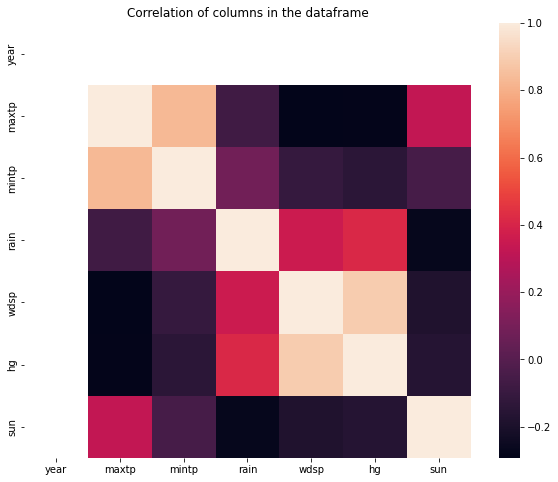

In [8]:

# Increase the size of the heatmap
plt.figure(figsize=(10,8))
# Store heatmap object in a variable to easily access it when you want to include more features and you can set the annotation parameter to True to display the correlation values on the heatmap.
sns.heatmap(data=relation)

plt.title("Correlation of columns in the dataframe")
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()

<h3>as we can see in above graph the corelation between the coloums</h3>
<p>on the right we have the scale which gives us the number where on 1 being the highest which means if the attribute has the corealtion value of 1 it is likely to be related with that coloumn </p>

<P>In the graph we can see that our coloumns like mintp and max tp are co related to each other , while sun and maxtp also has some relation while on the other side we can clearly observe that the HF and wdsp are two coloumns which are related to each other and therefore they have higher corelation value than other </p>

<p> so with this interpritation we can say that the corelation show the attributes which are related to each other where in maximun value of realtion can be defined as 1 and higher the value of relation the more likely the column are related </p>

<h3>Q3</h3>

3. Write code to answer the following questions: (15 marks)
    1. How many different weather stations are included in the data set?
    1. At what station and on what date was the lowest minimum air temperature recorded?
    1. At what station and on what date was the largest amount of rain recorded?

<h4>1</h4>

<p>we can findout the differnt stations by just checking the number of unique values in our data set </p>

<p>so for our dataset we can clearly see that there are three unique values in the weather data set which are as follows </p>
<li>Dublin Airport</li>
<li>Shanon Airport</li>
<li>Cork Airport</li>

In [9]:
weather_df.columns
stations_incl = weather_df['station'].unique()
pprint.pprint(stations_incl)

array(['Dublin Airport', 'Shannon Airport', 'Cork Airport'], dtype=object)


<h4>2</h4>

 <p> we can get the value of minimum temprature just by calling the pandas data frame pandas.min() method which on be half of out will just return the row where the value of minimum temprature is minimum </p>

<p> as part of our analysis we can clearly see that on Jan 9th Dublin Airport recorded the lowest temprature of  - 5.9 out of all three station in our dataset  </p>

In [10]:
weather_df.columns
weather_df[weather_df.mintp == weather_df.mintp.min()]


,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
day,,,,,,,,,
9,jan,2021,Dublin Airport,2.4,-5.9,0.0,6.5,19.0,6.8


<h4>3</h4>

 <p> we can get the value of minimum temprature just by calling the pandas data frame pandas.max() method, which on be half of us  will just return the row where the value of rain coloumn is maximum </p>

<p> as part of our analysis we can clearly see that on oct 27th cork Airport recorded the highest Rain of  50.1 mm  out of all three station in our dataset  </p>

In [11]:
weather_df.columns
weather_df[weather_df.rain == weather_df.rain.max()]


,month,year,station,maxtp,mintp,rain,wdsp,hg,sun
day,,,,,,,,,
27,oct,2021,Cork Airport,14.7,12.4,50.1,16.4,36.0,0.0


<h3>Q4</h3>

4. Create a numerical summary (mean, standard deviation, minimum, maximum, etc.) for each of the weather measurements. Discuss and interpret your results. (8 marks)

<p> df.describe() method computes and displays summary statistics for a Python dataframe </p>

<p> This gives us output such as mean,median, standard devaition ,minimum,maximum etc </p>

<p> for our data we can see the first row which shows count it just counts the number of data we have so for example we have 1095 total data which is why year's count is 1095 and while there is missing data for other it ignores that so the count is 1093 etc</p>

<p> mean gives us the average of the values in columns where we can see the average max temp is 13.73 and mean temp is 6.95 and so on</p>

<p> standard deviation shows how the data is disperd in accordance with mean lower the score of standard deviation the more the data is nearer to mean  </p>

<p> 25% means for max tp 25% of your data have the value 10.2000 or below. </p>

<p> 50% means for max tp 50% of your data have the value 13.4000 or below. for min tp value is 7.10 and so on for other coloumns </p>

<p> 70% means for max tp 70% of your data have the value 17.6000 or below. for min tp value is 10.7 and so on for other coloumns </p>

<p> max gives us the maximum value of all the coloumn</p>


In [12]:
weather_df.describe()

,year,maxtp,mintp,rain,wdsp,hg,sun
count,1095.0,1093.000000,1093.000000,1091.000000,1094.000000,1092.000000,1093.000000
mean,2021.0,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
std,0.0,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
min,2021.0,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
25%,2021.0,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
50%,2021.0,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
75%,2021.0,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
max,2021.0,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


5. Create a graphical summary for each of the weather measurements. Discuss your plots in relation to the summary statistics found in question 4. (10 marks)

In [13]:
num_col = weather_df._get_numeric_data().columns

describe_num_df = weather_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']

In [14]:
describe_num_df

,index,year,maxtp,mintp,rain,wdsp,hg,sun
1,mean,2021.0,13.732662,6.950046,2.596242,8.587020,22.863553,4.036780
2,std,0.0,5.107554,4.687423,4.864790,3.705469,8.396710,3.958998
3,min,2021.0,0.600000,-5.900000,0.000000,1.900000,7.000000,0.000000
4,25%,2021.0,10.200000,3.400000,0.000000,6.000000,17.000000,0.300000
5,50%,2021.0,13.400000,7.100000,0.300000,7.900000,21.000000,2.900000
6,75%,2021.0,17.600000,10.700000,3.050000,10.600000,28.000000,6.600000
7,max,2021.0,29.600000,18.700000,50.100000,26.300000,64.000000,15.200000


<li> for the graph 1 we can see year graph of year which does not really makes sense but we can see mean std min and max on index side</li>

<li>2. This is max Tp vs index graph which shows the statistical analysis of the maxtp where in we can interprit that the mean for max tp is between 10-15 which is 13.73 while standard deviation is 5.10  the minimum value for maxtp is 0.600 while 25% values are 10.200 or below, 50% values are 13.400 or below,75% values are 17.600 or below  and maximum value for the coloumn is 29.60</li>

<li>3. This is min Tp vs index graph which shows the statistical analysis of the maxtp where in we can interprit that the mean for min tp is 6.95 while standard deviation is 4.68  the minimum value for mintp is -5.90 while 25% values are 3.400 or below, 50% values are 7.100 or below,75% values are 10.700 or below  and maximum value for the coloumn is 18.70</li>

<li>4. This is rain vs index graph which shows the statistical analysis of the rain where in we can interprit that the mean for rain is 2.59 while standard deviation is 4.88  the minimum value for rain is 0 while 25% values are 0 or below, 50% values are 0.30 or below,75% values are 3.05 or below  and maximum value for the coloumn is 50.100</li>

<li>5. This is wdsp vs index graph which shows the statistical analysis of the wdsp where in we can interprit that the mean for wdsp  is 8.58 while standard deviation is 3.7  the minimum value for wdsp is 1.9 while 25% values are 6 or below, 50% values are 7.9 or below,75% values are 10.06 or below  and maximum value for the coloumn is 26.30</li>

<li>6. This is hg vs index graph which shows the statistical analysis of the maxtp where in we can interprit that the mean for hg is 22.86 while standard deviation is 8.39  the minimum value for hg is 7.00  while 25% values are 17.400 or below, 50% values are 21.100 or below,75% values are 28.700 or below  and maximum value for the coloumn is 64.70</li>

<li>7. This is sunLight vs index graph which shows the statistical analysis of the sunlight where in we can interprit that the mean for min tp is 4.05 while standard deviation is 3.98  the minimum value for sunlight is 0 while 25% values are 0.300 or below, 50% values are 2.9 or below,75% values are 6.50 or below  and maximum value for the coloumn is 15.20</li>

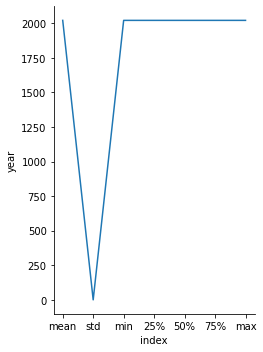

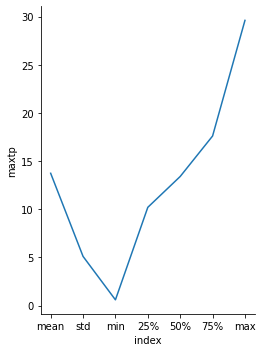

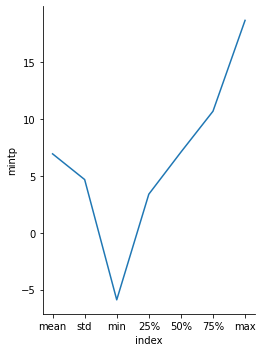

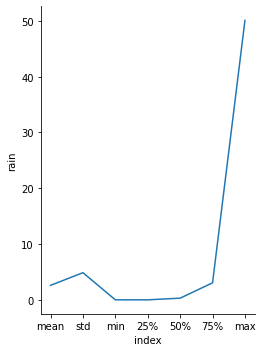

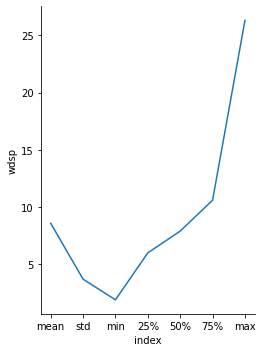

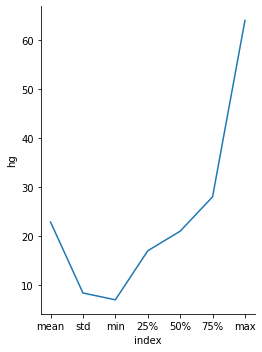

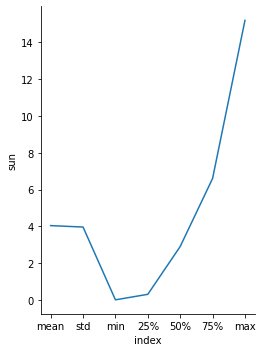

In [15]:
for i in num_col:
    if i in ['index']:
      continue
    sns.relplot(
    data=describe_num_df,
    x="index", y=i,
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)
        



6. Produce a scatter plot of the maximum temperature versus the minimum temperature and colour your points based on month. Interpret your plot. (8 marks)

<p>In the graph below we can see on x axix there is maximum temprature and on y axis min temprature is mentioned and scatter plot shows us the data month wise where we can interpret from plot is the coldest month wher the temprature was lowest was jan which we can see the lowest temprature was recorded in jan while the hottest one being the july where the maximum tempratures is recorded which is 30 and so on by this graph we can see the month which were coldest and hotest in the year for all the three stations where by looking at graph we can identify that the lowest tempratures are seen in month of nov dec and januvary whule as we go up from jan the months starts to get hotter and gets hotest in month of june , july while the mild tempratures are seen from apr march </p>

<AxesSubplot:xlabel='maxtp', ylabel='mintp'>

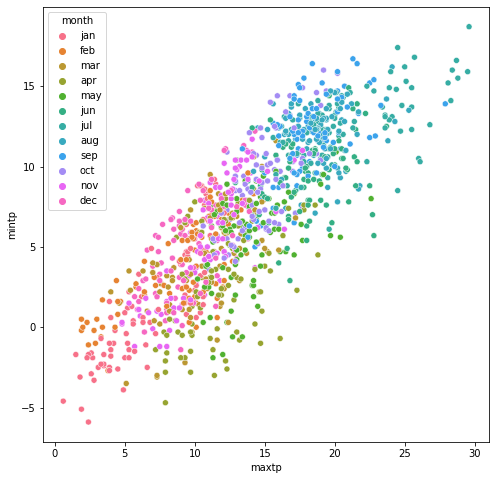

In [16]:

plt.figure(figsize=(8,8))
sns.scatterplot(data=weather_df, x="maxtp", y="mintp",hue='month',legend='full')

7. Compute the daily temperature range, and add this as an additional variable to your DataFrame. Print out the first few rows of your DataFrame to show that the column has been added correctly. (5 marks)

In [17]:

#calculating daily range by calculating difference between daily_max temp and min temp
weather_df['Range'] = (weather_df['maxtp'] - weather_df['mintp']) / 2


In [18]:
weather_df.head()

,month,year,station,maxtp,mintp,rain,wdsp,hg,sun,Range
day,,,,,,,,,,
1,jan,2021,Dublin Airport,5.0,-1.9,0.0,8.8,19.0,6.6,3.45
2,jan,2021,Dublin Airport,3.5,-2.4,0.1,10.1,19.0,2.4,2.95
3,jan,2021,Dublin Airport,3.9,-2.5,4.1,9.2,30.0,0.6,3.20
4,jan,2021,Dublin Airport,5.3,2.2,0.5,11.5,27.0,0.6,1.55
5,jan,2021,Dublin Airport,5.2,1.2,1.0,9.5,25.0,1.0,2.00


8. Plot the daily temperature range versus the hours of sunlight per day, colouring the points based on the weather station. Interpret your plot. (8 marks)

<p> In the below graph we can clearly see on x axis there is daily temprature range and on Y axis we can see the sunlight in hours and the different colours of scatter plots are the stations of our data so by the data we are able to interprit that the cork aiport recives the least sunlight when the temprature is in range from 0-3 as this is directly realtes that cork also has some of the coldest days reciveing less sunlight while on the other hand dublin recives 2-4 hours of sunlight  in daily temprature range from 2-5 and lastly shanon airport recives 3-4 hours of sun light roughly when daily averge temprature is between 2-5 also we can see the as the daily averege temprature increases there is is an increase of sunlights recieved by the airports </p>

<AxesSubplot:xlabel='Daily Temprature Range', ylabel='Sunlight in hours'>

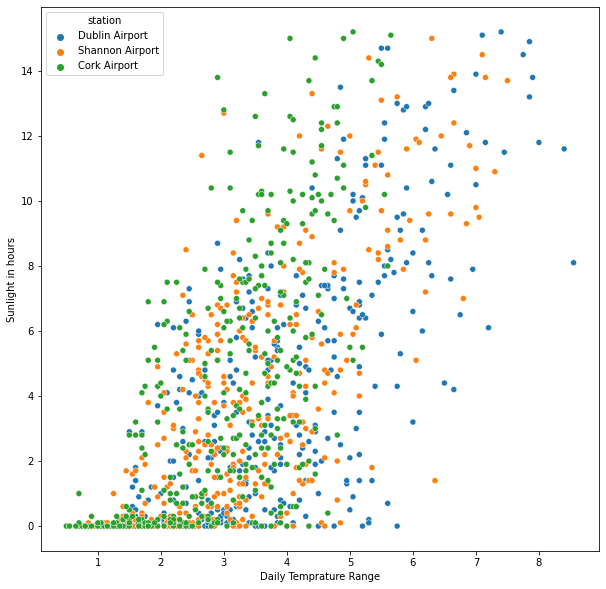

In [19]:

plt.figure(figsize=(10,10))
plt.xlabel('Daily Temprature Range')
plt.ylabel('Sunlight in hours')
sns.scatterplot(data=weather_df, x="Range", y="sun",hue='station',legend='full')

9. Perform a comparative analysis of the weather at Dublin Airport, Shannon Airport and Cork Airport. (20 marks)

    For full marks on this question you should create numerical and graphical summaries of the weather measurements at each weather station and discuss how the weather differs (or is similar) across these locations. 

<p> with this we can create the data frame for all individual airports </p>

In [20]:
a=365 #365 days of dublin airport 0-365 in datafrane
b=a*2 #365 days of shanon airport 365:730 in dataframe
c=a*3 #365 days of cork airport 730:1095 in data frame
print(a,b,c)
dub_df = weather_df.iloc[:a] #dublin airport
shanon_df = weather_df.iloc[a:b] #shanon airport
cork_df = weather_df.iloc[b:c] #cork airport


365 730 1095


<h2>Going through stats of each airport with df.describe()</h2>

<h4>Dublin Airport</h4>

In [21]:
dub_df.describe()

,year,maxtp,mintp,rain,wdsp,hg,sun,Range
count,365.0,364.000000,364.000000,364.000000,365.000000,364.000000,364.000000,364.000000
mean,2021.0,13.590934,6.001099,1.828846,8.625753,22.623626,4.089835,3.794918
std,0.0,5.258806,4.748774,3.878082,3.456376,7.790196,3.981802,1.599706
min,2021.0,1.500000,-5.900000,0.000000,2.600000,10.000000,0.000000,0.700000
25%,2021.0,10.000000,2.000000,0.000000,6.100000,17.000000,0.500000,2.600000
50%,2021.0,13.300000,6.200000,0.100000,7.900000,21.000000,2.900000,3.675000
75%,2021.0,18.100000,9.900000,1.325000,10.500000,27.250000,6.800000,4.900000
max,2021.0,26.800000,15.800000,26.900000,24.400000,50.000000,15.200000,8.550000


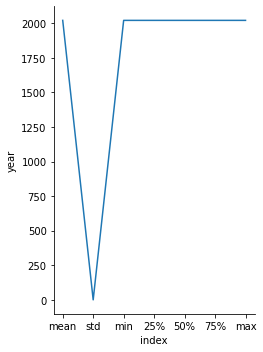

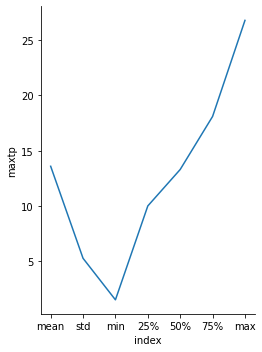

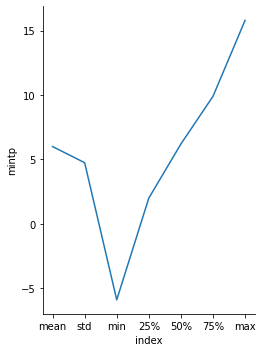

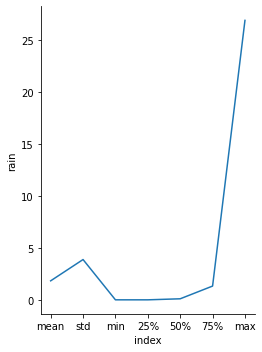

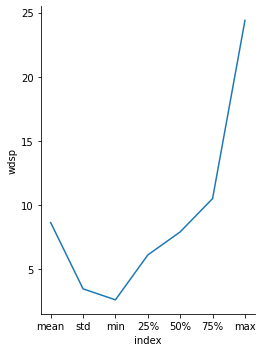

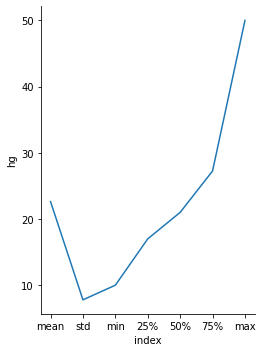

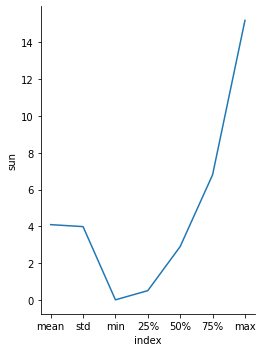

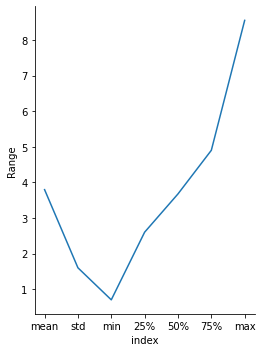

In [22]:
num_col = dub_df._get_numeric_data().columns
describe_num_df = dub_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
describe_num_df
for i in num_col:
    if i in ['index']:
      continue
    sns.relplot(
    data=describe_num_df,
    x="index", y=i,
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=True,))

   

<h4>Shanon Airport</h4>

In [23]:
shanon_df.describe()

,year,maxtp,mintp,rain,wdsp,hg,sun,Range
count,365.0,364.000000,364.000000,365.000000,365.000000,363.000000,364.000000,364.000000
mean,2021.0,14.368681,7.611813,2.549041,7.815342,21.796143,3.856044,3.378434
std,0.0,5.175728,4.820239,4.007511,3.575878,8.372032,3.817264,1.417160
min,2021.0,0.600000,-4.600000,0.000000,1.900000,8.000000,0.000000,0.850000
25%,2021.0,11.100000,4.275000,0.000000,5.400000,16.000000,0.400000,2.400000
50%,2021.0,14.100000,7.650000,0.500000,6.900000,20.000000,2.700000,3.150000
75%,2021.0,18.000000,11.525000,3.400000,9.700000,26.000000,6.200000,4.212500
max,2021.0,29.600000,18.700000,20.700000,25.800000,61.000000,15.000000,7.500000


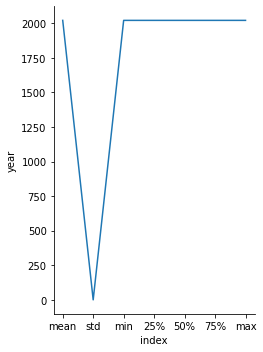

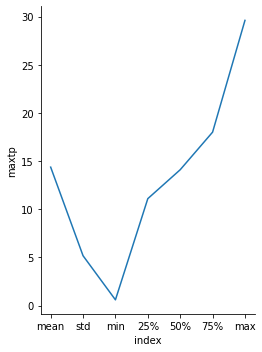

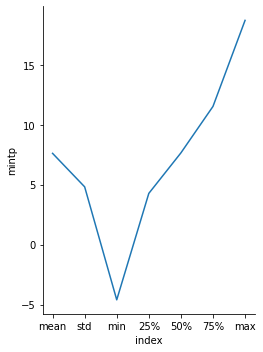

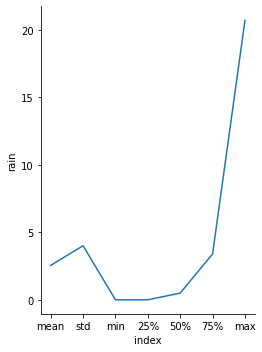

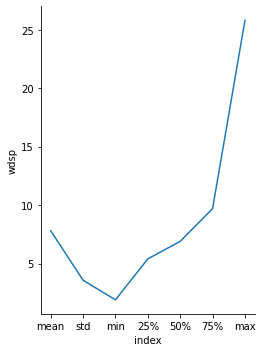

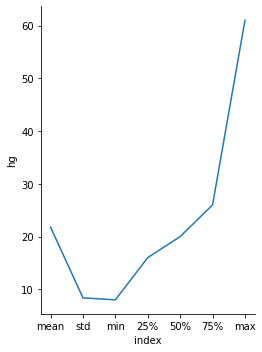

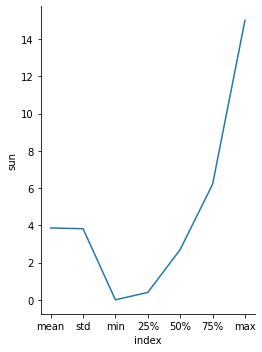

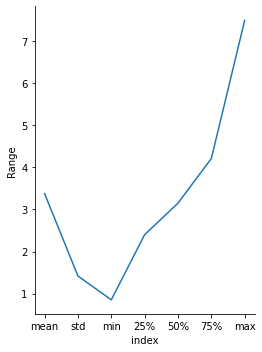

In [24]:
num_col = shanon_df._get_numeric_data().columns
describe_num_df = shanon_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
describe_num_df
for i in num_col:
    if i in ['index']:
      continue
    sns.relplot(
    data=describe_num_df,
    x="index", y=i,
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=True,))

   

<h4>Cork Airport</h4>

In [25]:
cork_df.describe()

,year,maxtp,mintp,rain,wdsp,hg,sun,Range
count,365.0,365.000000,365.000000,362.000000,364.000000,365.000000,365.000000,365.000000
mean,2021.0,13.239726,7.236438,3.415470,9.321978,24.164384,4.164110,3.001644
std,0.0,4.826949,4.339971,6.234737,3.924194,8.843284,4.077572,1.171413
min,2021.0,1.900000,-2.700000,0.000000,2.400000,7.000000,0.000000,0.500000
25%,2021.0,9.900000,3.800000,0.000000,6.600000,18.000000,0.200000,2.150000
50%,2021.0,12.800000,6.900000,0.600000,8.500000,23.000000,3.100000,3.100000
75%,2021.0,16.800000,11.100000,4.300000,11.200000,29.000000,7.000000,3.900000
max,2021.0,25.700000,17.400000,50.100000,26.300000,64.000000,15.200000,5.650000


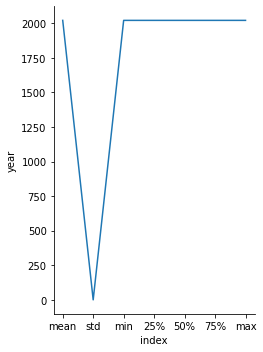

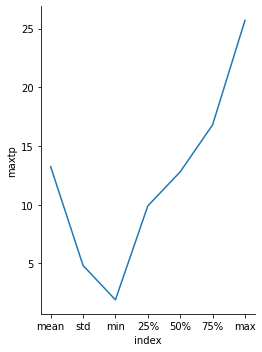

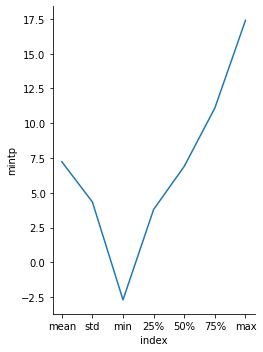

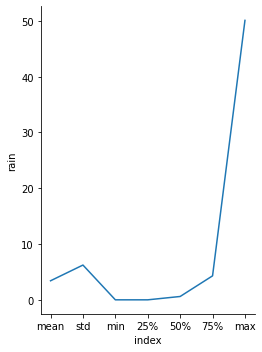

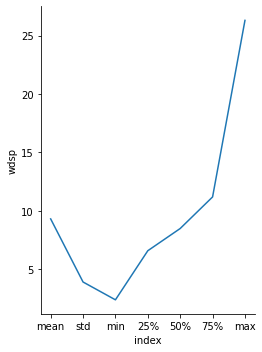

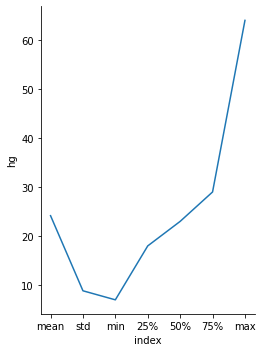

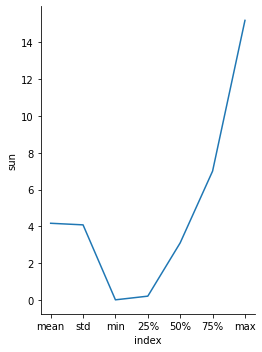

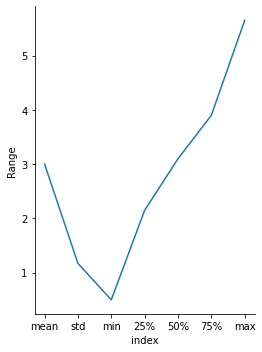

In [26]:
num_col = cork_df._get_numeric_data().columns
describe_num_df = cork_df.describe(include=['int64','float64'])
describe_num_df.reset_index(inplace=True)
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
describe_num_df
for i in num_col:
    if i in ['index']:
      continue
    sns.relplot(
    data=describe_num_df,
    x="index", y=i,
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=True,))

   

<h3>Max and min temprature between all three airports</h3>

In [27]:
cork_df.columns

Index(['month', 'year', 'station', 'maxtp', 'mintp', 'rain', 'wdsp', 'hg',
       'sun', 'Range'],
      dtype='object')

<AxesSubplot:xlabel='Max Temprature Scale Dublin Airport', ylabel='maxtp'>

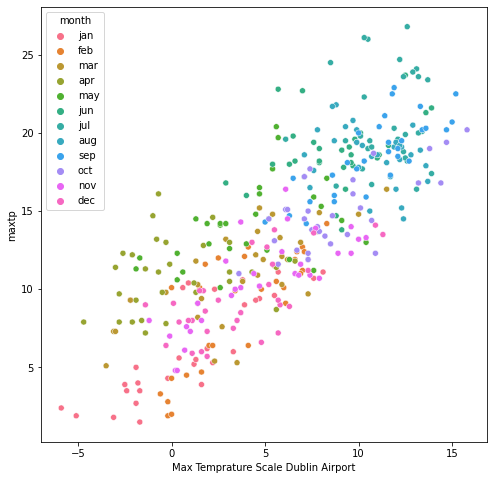

In [28]:
plt.figure(figsize=(8,8))
plt.xlabel('Min Temprature Scale Dublin Airport')
plt.ylabel('Max Temprature Scale Dublin Airport')
sns.scatterplot(x= dub_df['mintp'],y= dub_df['maxtp'],hue=dub_df['month'])

<AxesSubplot:xlabel='Max Temprature Scale shanon Airport', ylabel='maxtp'>

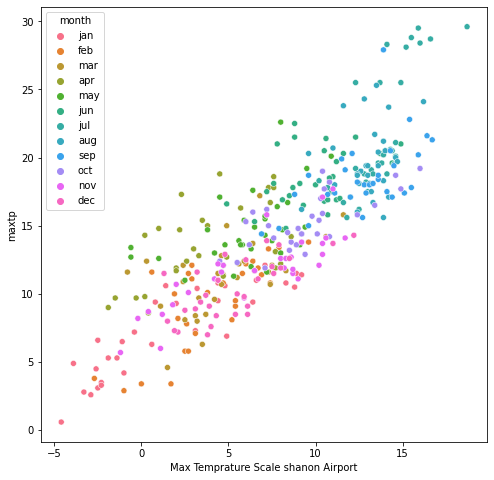

In [29]:
plt.figure(figsize=(8,8))
plt.xlabel('Min Temprature Scale shanon Airport')
plt.ylabel('Max Temprature Scale shanon Airport')
sns.scatterplot(x= shanon_df['mintp'],y= shanon_df['maxtp'],hue=shanon_df['month'])


<AxesSubplot:xlabel='Max Temprature Scale Cork Airport', ylabel='maxtp'>

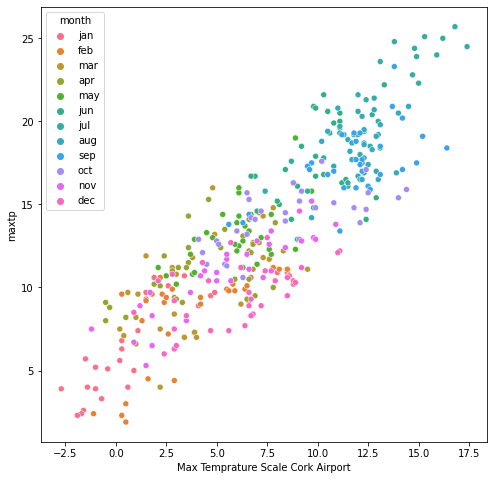

In [30]:
plt.figure(figsize=(8,8))
plt.xlabel('Min Temprature Scale Cork Airport')
plt.ylabel('Max Temprature Scale Cork Airport')
sns.scatterplot(x= cork_df['mintp'],y= cork_df['maxtp'],hue=cork_df['month'])


<p>As from above graphs we can see that the shanon aiprt has less hot summers  while on the other hand the Dublin airport with more hot summers and cork observed less hotter summer then dublin and comparetively was more hot than that of shanon airport</p>

<p>Below are the some of the insights which can be found out from the graph they are as follows</p>

<p>coldest airport in order </p>
<li>1. Dublin Airport had coldest day</li>
<li>2. Shanon Airport</li>
<li>3. cork airport</li>

<p>Airport recieving Highest rain in (mm) </p>
<li>1. Cork Airport recieved 50 mm of rain in one day</li>
<li>2. Shanon Airport</li>
<li>3. Dublin airport</li>

<p>Airport recieving Highest sunlight in hours  </p>
<li>1. Cork Airport recives the most sunlight than dublin and shanon airport</li>
<li>2. Dublin Airport</li>
<li>3. shanon airport</li>

<p>Airport recieving Highest mean windpseed  </p>
<li>1. Cork Airport is more windy when compared with dublin and shanon airport</li>
<li>2. Dublin Airport</li>
<li>3. shanon airport</li>

<p>Airport with highest Gust  </p>
<li>1. Cork Airport </li>
<li>2. Dublin Airport</li>
<li>3. shanon airport</li>



<p> some more useful insights </p>
<li> lowest temprature in Dublin was recored on 9th jan 2021 which was -5.9 coldest when compare to all three stations</li>

<li> on 27 oct 2021 cork recieved maximum rain of 55mm </li>

<li> on 30	may	2021 both dublin and cord airport recieved maximum sunlight for 15.2 hours </li>

<li> on 22	july 2021 Shanon airport recorded maximum temprature of 29.6 </li>

<li> on 07	Dec 2021 cork airport obeserved maximum windspeed of 26.3 </li>